<a href="https://colab.research.google.com/github/Nehalll-code/Phishing-Detection-on-Encrypted-Email-Analysis/blob/main/BaselineModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Step 1: Clone your repo (only if folder doesn't already exist)
!git clone https://github.com/Nehalll-code/Phishing-Detection-on-Encrypted-Email-Analysis.git

# Step 2: Go inside the repo
%cd Phishing-Detection-on-Encrypted-Email-Analysis

# Step 3: Pull updates (safe to run even right after clone)
!git pull origin main

%cd /content/Phishing-Detection-on-Encrypted-Email-Analysis/Phishing-Detection-on-Encrypted-Email-Analysis
!ls   # list files to confirm



Cloning into 'Phishing-Detection-on-Encrypted-Email-Analysis'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 14 (delta 2), reused 3 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (14/14), 17.87 MiB | 15.79 MiB/s, done.
Resolving deltas: 100% (2/2), done.
/content/Phishing-Detection-on-Encrypted-Email-Analysis/Phishing-Detection-on-Encrypted-Email-Analysis/Phishing-Detection-on-Encrypted-Email-Analysis
From https://github.com/Nehalll-code/Phishing-Detection-on-Encrypted-Email-Analysis
 * branch            main       -> FETCH_HEAD
Already up to date.
/content/Phishing-Detection-on-Encrypted-Email-Analysis/Phishing-Detection-on-Encrypted-Email-Analysis
Phishing-Detection-on-Encrypted-Email-Analysis	Phishing_Email.csv


In [12]:
!git pull origin main


From https://github.com/Nehalll-code/Phishing-Detection-on-Encrypted-Email-Analysis
 * branch            main       -> FETCH_HEAD
Already up to date.


In [13]:
!git fetch origin
!git reset --hard origin/main


HEAD is now at 82509f9 Delete DataCleaning.ipynb


In [14]:
# Remove the folder and all its contents, including hidden files
!rm -rf Phishing-Detection-on-Encrypted-Email-Analysis


In [15]:
ls


Phishing_Email.csv


In [16]:
# Step 1: Clone your repo (only if folder doesn't already exist)
!git clone https://github.com/Nehalll-code/Phishing-Detection-on-Encrypted-Email-Analysis.git

# Step 2: Go inside the repo
%cd Phishing-Detection-on-Encrypted-Email-Analysis

# Step 3: Pull updates (safe to run even right after clone)
!git pull origin main

%cd /content/Phishing-Detection-on-Encrypted-Email-Analysis/Phishing-Detection-on-Encrypted-Email-Analysis
!ls   # list files to confirm


Cloning into 'Phishing-Detection-on-Encrypted-Email-Analysis'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 14 (delta 2), reused 3 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (14/14), 17.87 MiB | 15.91 MiB/s, done.
Resolving deltas: 100% (2/2), done.
/content/Phishing-Detection-on-Encrypted-Email-Analysis/Phishing-Detection-on-Encrypted-Email-Analysis/Phishing-Detection-on-Encrypted-Email-Analysis
From https://github.com/Nehalll-code/Phishing-Detection-on-Encrypted-Email-Analysis
 * branch            main       -> FETCH_HEAD
Already up to date.
/content/Phishing-Detection-on-Encrypted-Email-Analysis/Phishing-Detection-on-Encrypted-Email-Analysis
Phishing-Detection-on-Encrypted-Email-Analysis	Phishing_Email.csv


In [17]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [18]:
df = pd.read_csv('/content/Phishing-Detection-on-Encrypted-Email-Analysis/Phishing_Email.csv')
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [19]:
df = df.drop(columns=['Unnamed: 0'],errors='ignore')

In [20]:
df.head()

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [21]:
df = df.dropna(subset=['Email Text'])

In [22]:
df["Label"] = df['Email Type'].map({"Safe Email":0,"Phishing Email":1})

In [23]:
print(df.head())

                                          Email Text      Email Type  Label
0  re : 6 . 1100 , disc : uniformitarianism , re ...      Safe Email      0
1  the other side of * galicismos * * galicismo *...      Safe Email      0
2  re : equistar deal tickets are you still avail...      Safe Email      0
3  \nHello I am your hot lil horny toy.\n    I am...  Phishing Email      1
4  software at incredibly low prices ( 86 % lower...  Phishing Email      1


In [24]:
print(df["Label"].value_counts())

Label
0    11322
1     7312
Name: count, dtype: int64


In [25]:
df.head()

,Email Text,Email Type,Label
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email,0
1,the other side of * galicismos * * galicismo *...,Safe Email,0
2,re : equistar deal tickets are you still avail...,Safe Email,0
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email,1
4,software at incredibly low prices ( 86 % lower...,Phishing Email,1


In [26]:
df.to_csv("cleaned_emails.csv", index=False)

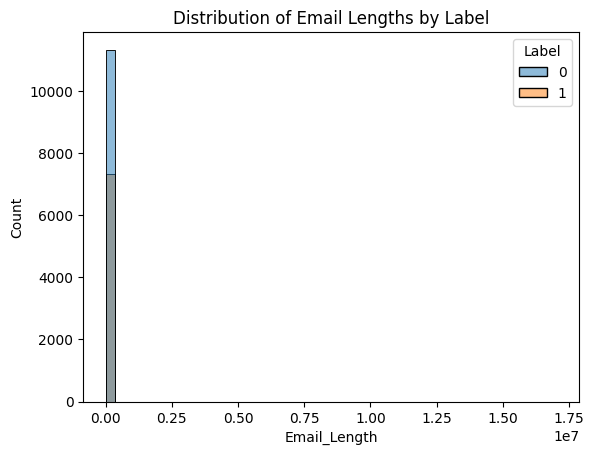

In [27]:
df['Email_Length'] = df['Email Text'].apply(len)
sns.histplot(df, x='Email_Length', hue='Label', bins=50)
plt.title("Distribution of Email Lengths by Label")
plt.show()


In [28]:
print(df[df['Label']==1]['Email Text'].head(3))  # phishing
print(df[df['Label']==0]['Email Text'].head(3))  # legitimate


3    \nHello I am your hot lil horny toy.\n    I am...
4    software at incredibly low prices ( 86 % lower...
7    entourage , stockmogul newsletter ralph velez ...
Name: Email Text, dtype: object
0    re : 6 . 1100 , disc : uniformitarianism , re ...
1    the other side of * galicismos * * galicismo *...
2    re : equistar deal tickets are you still avail...
Name: Email Text, dtype: object


In [29]:
df['Email Length'] = df['Email Text'].apply(lambda x: len(str(x)))
df.sort_values('Email Length', ascending=False).head(5)


,Email Text,Email Type,Label,Email_Length,Email Length
12500,"0,""Subject: great part-time or summer job ! * ...",Safe Email,0,17036692,17036692
11294,change your settings: http://blo.gs/settings.p...,Safe Email,0,194978,194978
8068,=?GB2312?B?yNW12squ0ru97NbQufq5+rzKtefX08nosb...,Phishing Email,1,129635,129635
15993,enron mentions enron discusses credit line of ...,Safe Email,0,120761,120761
10804,------------------------ Yahoo! Groups Sponsor...,Safe Email,0,107989,107989


In [30]:
# Remove NaN, strange objects, or lists
df = df[df['Email Text'].notna()]
df['Email Text'] = df['Email Text'].astype(str)

# Optionally drop ridiculously long entries
df = df[df['Email Text'].str.len() < 5000]


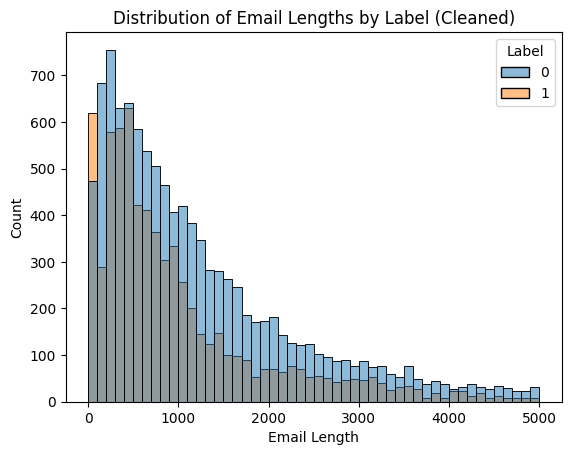

In [31]:
df['Email Length'] = df['Email Text'].apply(len)

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df, x='Email Length', hue='Label', bins=50)
plt.title("Distribution of Email Lengths by Label (Cleaned)")
plt.show()


In [32]:
df.sort_values('Email_Length', ascending=False).head(5)


,Email Text,Email Type,Label,Email_Length,Email Length
5562,"re : enymex brad , we may consider targeting a...",Safe Email,0,4998,4998
15031,"DivX News (Number 20, 2002-07-19)\n===========...",Safe Email,0,4996,4996
5224,"incres yor pns size 2 day hey forest , the ori...",Phishing Email,1,4992,4992
6043,CNET Investor Dispatch\nQuote LookupEnter symb...,Safe Email,0,4989,4989
18302,more on nlp to the readers : i have recently s...,Safe Email,0,4983,4983


TF-IDF Vectorization




In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Fit and transform the email text
X = tfidf.fit_transform(df['Email Text'])

# Target labels
y = df['Label']


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [35]:
#Train the Model

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [36]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9679190751445087

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      2095
           1       0.94      0.98      0.96      1365

    accuracy                           0.97      3460
   macro avg       0.96      0.97      0.97      3460
weighted avg       0.97      0.97      0.97      3460


Confusion Matrix:
 [[2016   79]
 [  32 1333]]


In [37]:
import joblib

joblib.dump(tfidf, 'tfidf_vectorizer.pkl')
joblib.dump(model, 'baseline_model.pkl')


['baseline_model.pkl']

In [38]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
print(classification_report(y_test, nb_pred))


              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2095
           1       0.97      0.91      0.94      1365

    accuracy                           0.95      3460
   macro avg       0.96      0.94      0.95      3460
weighted avg       0.95      0.95      0.95      3460



BaseLine model as Logistic Regression along with TF-IDF performs better than Naive Bayes model

The LR misses only a few phishing emails


In [39]:
%cd /content/Phishing-Detection-on-Encrypted-Email-Analysis/Phishing-Detection-on-Encrypted-Email-Analysis


/content/Phishing-Detection-on-Encrypted-Email-Analysis/Phishing-Detection-on-Encrypted-Email-Analysis


In [40]:
!git init


Reinitialized existing Git repository in /content/Phishing-Detection-on-Encrypted-Email-Analysis/Phishing-Detection-on-Encrypted-Email-Analysis/.git/


In [42]:
!git config --global user.email "nehalverma241@gmail.com"
!git config --global user.name "Nehal"


In [43]:
!git add .


hint: You've added another git repository inside your current repository.
hint: Clones of the outer repository will not contain the contents of
hint: the embedded repository and will not know how to obtain it.
hint: If you meant to add a submodule, use:
hint: 
hint: 	git submodule add <url> Phishing-Detection-on-Encrypted-Email-Analysis
hint: 
hint: If you added this path by mistake, you can remove it from the
hint: index with:
hint: 
hint: 	git rm --cached Phishing-Detection-on-Encrypted-Email-Analysis
hint: 
hint: See "git help submodule" for more information.


In [44]:
%cd /content/Phishing-Detection-on-Encrypted-Email-Analysis


/content/Phishing-Detection-on-Encrypted-Email-Analysis


In [45]:
!rm -rf Phishing-Detection-on-Encrypted-Email-Analysis/.git


In [46]:
!git add .


hint: You've added another git repository inside your current repository.
hint: Clones of the outer repository will not contain the contents of
hint: the embedded repository and will not know how to obtain it.
hint: If you meant to add a submodule, use:
hint: 
hint: 	git submodule add <url> Phishing-Detection-on-Encrypted-Email-Analysis/Phishing-Detection-on-Encrypted-Email-Analysis
hint: 
hint: If you added this path by mistake, you can remove it from the
hint: index with:
hint: 
hint: 	git rm --cached Phishing-Detection-on-Encrypted-Email-Analysis/Phishing-Detection-on-Encrypted-Email-Analysis
hint: 
hint: See "git help submodule" for more information.


In [47]:
!git commit -m "Fixed nested git repo issue and added BaselineModel files"


[main 7a1bea4] Fixed nested git repo issue and added BaselineModel files
 5 files changed, 350161 insertions(+)
 create mode 160000 Phishing-Detection-on-Encrypted-Email-Analysis/Phishing-Detection-on-Encrypted-Email-Analysis
 create mode 100644 Phishing-Detection-on-Encrypted-Email-Analysis/Phishing_Email.csv
 create mode 100644 Phishing-Detection-on-Encrypted-Email-Analysis/baseline_model.pkl
 create mode 100644 Phishing-Detection-on-Encrypted-Email-Analysis/cleaned_emails.csv
 create mode 100644 Phishing-Detection-on-Encrypted-Email-Analysis/tfidf_vectorizer.pkl


In [48]:
!git push -u origin main


fatal: could not read Username for 'https://github.com': No such device or address
